# PRACTICA-05: Análisis de Componentes Principales (PCA)

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con $n$ individuos cada uno con $p$ variables ($X_{1}, X_{2}, …, X_{p}$), es decir, el espacio muestral tiene $p$ dimensiones. PCA permite encontrar un número de factores subyacentes ($z<p$) que explican aproximadamente lo mismo que las $p$ variables originales. Donde antes se necesitaban $p$ valores para caracterizar a cada individuo, ahora bastan $z$ valores. Cada una de estas $z$  nuevas variables recibe el nombre de **componente principal**.

**Objetivo**: Reducir la dimensionalidad de un dataset y así simplificar el modelado posterior.

* Estandarizar los datos (para cada una de las $m$ observaciones)
* Obtener los vectores y valores propios a partir de la matriz de covarianzas o de correlaciones o incluso la técnica de Descomposición de Valores Singulares.
* Ordenar los valores propios en orden descendente y quedarnos con los $p$ que se correspondan a los $p$ mayores y así disminuir el número de variables del dataset ($p<m$)
* Constrir la matriz de proyección $W$ a partir de los $p$ vectores propios
* Transformar el dataset original $X$ a través de $W$ para así obtener datos en el subespacio dimensional de dimensión $p$, que será $Y$

## Dataset
El dataset de clasificación contiene las medidas de flores (en centímetros) que pertenecen a 3 especies diferentes:
* Iris-setosa
* Iris-versicolor
* Iris-virginica

Contiene 4 atributos o características. En particular, la **longitud** y la **anchura** de sus pétalos y sépalos expresadas en centímetros. Por tanto, se trata de un problema de 4 dimensiones.

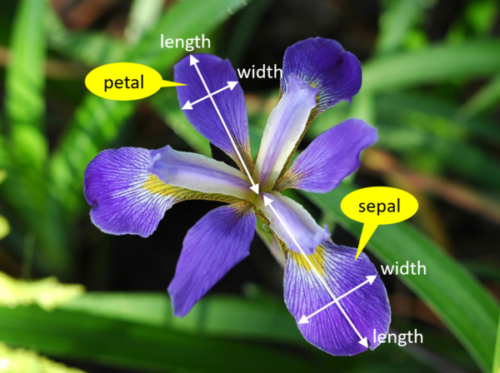

In [1]:
import IPython.display as display
from PIL import Image
display.display(Image.open('iris_petal-sepal.png'))

In [2]:
# Carga de los datos y librerías
import pandas as pd

In [3]:
df = pd.read_csv("iris.csv")

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Gráfico de dispersión
El diagrama de dispersión es una buena manera de visualizar las correlaciones entre las características. Se examina la correlación de **Longitud del sépalo** con otras características. Entonces, **Longitud del sépalo** será nuestro eje $y$, otros se ubicarán en el eje $x$. Entonces se clasifican y se mantienen en marcos de datos distintos para ver las correlaciones claramente.

In [5]:
data_sorted_bySW = df.sort_values('Sepal.Width')
data_sorted_byPL = df.sort_values('Petal.Length')
data_sorted_byPW = df.sort_values('Petal.Width')

In [6]:
!pip install plotly
!pip install cufflinks

In [7]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

df2 = df.iloc[:100, :]

bySW = go.Scatter(
                    x = data_sorted_bySW['Sepal.Width'],
                    y = data_sorted_bySW['Sepal.Length'],
                    mode = "markers",
                    name = "Ancho del sépalo (cm)",
                    marker = dict(color = 'rgba(255, 0, 0, 0.9)'),
                    text = data_sorted_bySW.Species
)

byPL = go.Scatter(
                    x = data_sorted_byPL['Petal.Length'],
                    y = data_sorted_byPL['Sepal.Length'],
                    mode = "markers",
                    name = "Longitud del pétalo (cm)",
                    marker = dict(color = 'rgba(0, 255, 0, 0.9)'),
                    text = data_sorted_byPL.Species
)

byPW = go.Scatter(
                    x = data_sorted_byPW['Petal.Width'],
                    y = data_sorted_byPW['Sepal.Length'],
                    mode = "markers",
                    name = "Ancho del pétalo (cm)",
                    marker = dict(color = 'rgba(0, 0, 255, 0.9)'),
                    text = data_sorted_byPW.Species
)

layout = dict(title = 'Cambio de longitud del sépalo por otras propiedades',
              xaxis= dict(title= 'centimetros',ticklen= 5,zeroline= False)
             )
u = [bySW, byPL, byPW]
fig = dict(data = u, layout=layout)
iplot(fig)

* Parece que el **ancho del pétalo** y la **longitud del sépalo** tienen una correlación muy fuerte.
* Podemos decir que existe una correlación entre la **longitud del pétalo** y la **longitud del sépalo**, pero no como la anterior.
* No hay correlación entre la **longitud del sépalo** y el **ancho del sépalo**.

De manera que como existe una correlación lineal entre **ancho del pétalo** y **longitud del sépalo** una de las variables se podría excluir del proceso.

### Gráfica de dispersión 3D
Ahora se procede a analizar las tres variables restantes

In [8]:
i_setosa = df[df['Species']  == 'setosa']
i_versicolor = df[df['Species']  == 'versicolor']
i_virginica = df[df['Species']  == 'virginica']
i_setosa.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Iris-setosa
trace_setosa = go.Scatter3d(
                        x = i_setosa['Sepal.Length'],
                        y = i_setosa['Sepal.Width'],
                        z = i_setosa['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "setosa",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(255,102, 255,0.8)'
                        )
)

# Iris-versicolor
trace_versicolor = go.Scatter3d(
                        x = i_versicolor['Sepal.Length'],
                        y = i_versicolor['Sepal.Width'],
                        z = i_versicolor['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "versicolor",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(102, 255, 51, 0.8)'
                        )
)

# Iris-virginica
trace_virginica = go.Scatter3d(
                        x = i_virginica['Sepal.Length'],
                        y = i_virginica['Sepal.Width'],
                        z = i_virginica['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "virginica",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(51, 102, 255, 0.8)'
                        )
)

list_3d = [trace_setosa, trace_versicolor, trace_virginica]

fig_3d = go.Figure(data = list_3d)
iplot(fig_3d)

A continuación, dividimos el conjunto de datos en dos partes.

In [10]:
#matriz de datos y categoría
X = df.iloc[:,0:4].values
# la submatriz "x" contiene los valores de las primeras 4 columnas del dataframe y todas las filas\n

y = df.iloc[:,4].values
# El vector "y" contiene los valores de la 4 columna (especie) para todas las filas

In [11]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [12]:
y[0]

'setosa'

In [13]:
import plotly.graph_objects as go
import plotly.tools as tls

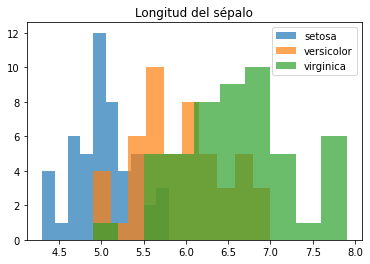

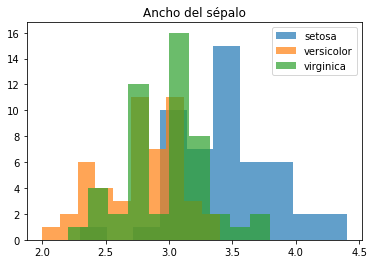

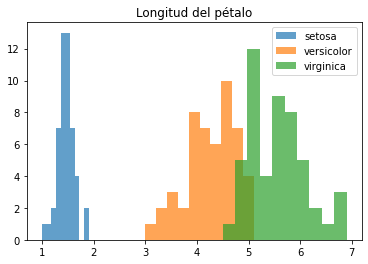

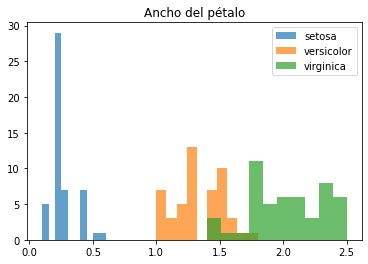

In [14]:
import matplotlib.pyplot as plt

i_setosa = df[df['Species']  == 'setosa']
i_versicolor = df[df['Species']  == 'versicolor']
i_virginica = df[df['Species']  == 'virginica']

plt.hist(i_setosa["Sepal.Length"], alpha=0.7, label='setosa',stacked=True)
plt.hist(i_versicolor["Sepal.Length"], alpha=0.7, label='versicolor',stacked=True)
plt.hist(i_virginica["Sepal.Length"], alpha=0.7, label='virginica',stacked=True)
plt.legend(loc='upper right')
plt.title("Longitud del sépalo")
plt.show()


plt.hist(i_setosa["Sepal.Width"], alpha=0.7, label='setosa')
plt.hist(i_versicolor["Sepal.Width"], alpha=0.7, label='versicolor')
plt.hist(i_virginica["Sepal.Width"], alpha=0.7, label='virginica')
plt.legend(loc='upper right')
plt.title("Ancho del sépalo")
plt.show()

plt.hist(i_setosa["Petal.Length"], alpha=0.7, label='setosa',stacked=True)
plt.hist(i_versicolor["Petal.Length"], alpha=0.7, label='versicolor')
plt.hist(i_virginica["Petal.Length"], alpha=0.7, label='virginica')
plt.legend(loc='upper right')
plt.title("Longitud del pétalo")
plt.show()


plt.hist(i_setosa["Petal.Width"], alpha=0.7, label='setosa')
plt.hist(i_versicolor["Petal.Width"], alpha=0.7, label='versicolor')
plt.hist(i_virginica["Petal.Width"], alpha=0.7, label='virginica')
plt.legend(loc='upper right')
plt.title("Ancho del pétalo")
plt.show()

# Normalización

Cuando las distintas características o atributos de un dataset están expresadas en distintas escalas se hace patente la necesidad de normalizar sus valores. En este caso, en el que las medidas de sépalos y pétalos están expresadas en centímetros, no sería imprescindible. Al aplicar esta técnica se asume que los datos de trabajo tienen una distribución gaussiana o normal. Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1. 

In [15]:
# Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal\n
from sklearn.preprocessing import StandardScaler

In [16]:
# estandariza las variables (i.e., por columna) a media cero y varianza unitaria
X_std = StandardScaler().fit_transform(X)

In [17]:
# estandariza las variables y grafica histogramas como los anteriores
dfX_std = pd.DataFrame(X_std)
dfX_std.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### 1- Calculamos la descomposición de valores y vectores propios
Los vectores propios son las direcciones en las que la varianza de los datos es mayor. La varianza  de una variable aleatoria es una medida de dispersión (definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media). Por tanto, las direcciones en las que la varianza es mayor, representan la esencia principal de la información contenida en el dataset, por eso se les llama Componentes Principales. Al igual que un vector propio es una dirección, el valor propio es un número, que representa el valor de la varianza sobre ese vector propio. Por ello, para encontrar las Componentes Principales que concentren esa esencia de la información del dataset, calcularemos primero la matriz de covarianza, que nos da la medida de dispersión conjunta entre variables.

##### a) Usando la Matriz de Covarianzas

In [18]:
from IPython.display import display, Math, Latex

In [19]:
display(Math(r'\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^m (x_{ij} - \overline{x_j})(x_{ik} - \overline{x_k})'))

<IPython.core.display.Math object>

In [20]:
# Matriz de covarianzas
display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

<IPython.core.display.Math object>

In [21]:
# Vector promedio (vector de promedios)
display(Math(r'\overline{x} = \sum_{i=1}^n x_i\in \mathbb R^m'))

<IPython.core.display.Math object>

In [22]:
import numpy as np

In [23]:
# Observar que la media es casi cero
mean_vect = np.mean(X_std, axis=0)
mean_vect

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [24]:
(X_std - mean_vect)[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [25]:
X_std[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [26]:
mean_vect

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [27]:
cov_matrix = (X_std - mean_vect).T.dot((X_std - mean_vect))/(X_std.shape[0]-1)
print("La matriz de covarianza es \n%s"%cov_matrix)

La matriz de covarianza es 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [28]:
np.cov(X_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [29]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


##### b) Usando la Matriz de Correlaciones

In [30]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [31]:
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [32]:
corr_matrix = np.corrcoef(X.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

##### c) Descomposición de Valores Singulares

In [33]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [34]:
s

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [35]:
v

array([[ 1.08239531e-01,  9.94577561e-02,  1.12996303e-01, ...,
        -7.27030413e-02, -6.56112167e-02, -4.59137323e-02],
       [-4.09957970e-02,  5.75731483e-02,  2.92000319e-02, ...,
        -2.29793601e-02, -8.63643414e-02,  2.07800179e-03],
       [ 2.72186462e-02,  5.00034005e-02, -9.42089147e-03, ...,
        -3.84023516e-02, -1.98939364e-01, -1.12588405e-01],
       ...,
       [ 5.43380310e-02,  5.12936114e-03,  2.75184277e-02, ...,
         9.89532683e-01, -1.41206665e-02, -8.30595907e-04],
       [ 1.96438400e-03,  8.48544595e-02,  1.78604309e-01, ...,
        -1.25488246e-02,  9.52049996e-01, -2.19201906e-02],
       [ 2.46978090e-03,  5.83496936e-03,  1.49419118e-01, ...,
        -7.17729676e-04, -2.32048811e-02,  9.77300244e-01]])

### 2 - Las componentes principales

In [36]:
# verifique que los vectores propios son unitarios (que forman una base al menos normal, 
# se podría pedir averiguar si es ortonormal)
for ev in eig_vectors:
    print("La longitud del VP es: %s"%np.linalg.norm(ev))

La longitud del VP es: 0.9999999999999997
La longitud del VP es: 0.9999999999999999
La longitud del VP es: 1.0
La longitud del VP es: 1.0000000000000002


In [37]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624875,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494815,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462876,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Ordenamos los vectores propios con valor propio de mayor a menor

In [38]:
eigen_pairs.sort()
eigen_pairs.reverse()
eigen_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624875,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494815,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462876,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Si lo que queremos es reducir la dimensionalidad del dataset, perdiendo la menor información posible, descartaremos los vectores propios cuyos valores propios sean más bajos, ya que son aquellos que menos información aportan al conjunto global.

In [39]:
print("Valores propios en orden descendente:")
for ep in eigen_pairs:
    print(ep[0])

Valores propios en orden descendente:
2.9380850501999918
0.9201649041624875
0.14774182104494815
0.020853862176462876


In [40]:
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

El objetivo de este caso es proyectar este dataset 4D en un espacio de menor dimensionalidad, para mejorar la eficiencia de cálculo, al mismo tiempo que se retiene la mayor parte de la información. La pregunta clave será ¿cuál va ser este valor? ¿3D?,   ¿2D?, ¿1D?. Para ello seguiremos el siguiente proceso.

Una vez ordenados los valores propios, que recordamos son una medida de la varianza de los datos, la cuestión es decidir, cuál es el menor número de vectores propios o componentes principales, con el que podemos expresar “la esencia principal” de la información contenida en ese dataset. Para ello, usaremos un métrica que se conoce como “varianza explicada”, que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.

In [41]:
plot1 = go.Bar(x=["CP %s"%i for i in range(1,5)], y = var_exp, showlegend=False)
plot2 = go.Scatter(x=["CP %s"%i for i in range(1,5)], y = cum_var_exp, showlegend=True, name = "% de Varianza Explicada Acumulada")

data = go.Data([plot1, plot2])

layout = go.Layout(xaxis = go.XAxis(title="Componentes principales"), 
               yaxis = go.YAxis(title = "Porcentaje de varianza explicada"),
               title = "Porcentaje de variabilidad explicada por cada componente principal")

fig = go.Figure(data = data, layout = layout)
fig.show()

C:\Users\danie\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\danie\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\Users\danie\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:572: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




En la gráfica se aprecia claramente que la mayor parte de la varianza (en torno al 72%) corresponde a la primera componente. La segunda acumula algo más del 22% de la varianza, mientras que la tercera (3%) puede ser descartada sin perder demasiada información, ya que las dos primeras componentes explican más del 94% de la varianza.

En este ejemplo, construiremos una matriz de proyección que convertirá el conjunto de datos inicial (de 4D) en un conjunto de datos de 2D centrado en las sus componentes principales (las direcciones de los vectores propios correspondientes). De esta forma, la tarea de interpretar los patrones de información contenidos en los datos, será mucho más sencilla.

In [42]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), 
               eigen_pairs[1][1].reshape(4,1)))
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [43]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

### 3- Proyectando las variables en el nuevo subespacio vectorial

In [44]:
display(Math(r'Y = X \cdot W, X \in M(\mathbb R)_{150, 4}, W \in M(\mathbb R)_{4,2}, Y \in M(\mathbb R)_{150, 2}'))

<IPython.core.display.Math object>

In [45]:
Y = X_std.dot(W)
Y

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

Y, por último, representamos gráficamente el nuevo espacio de datos, con éstas últimas líneas:

In [46]:
results = []

for name in ('setosa', 'versicolor', 'virginica'):
    result = go.Scatter(x=Y[y==name,0], y = Y[y==name, 1], 
                    mode = "markers", name=name, 
                     marker=go.Marker(size = 12, line = go.Line(color='rgba(220,220,220,0.15)', width=0.5), opacity = 0.8))
    results.append(result)

data = go.Data(results)
layout = go.Layout(showlegend=True, scene =go.Scene(xaxis=go.XAxis(title="Componente Principal 1"),
                                             yaxis=go.YAxis(title="Componente Principal 2")))

fig = go.Figure(data=data, layout=layout)
fig.show()

C:\Users\danie\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\danie\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\danie\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




Por lo tanto, se ha conseguido reducir el conjunto de datos de trabajo inicial a un conjunto de datos de dos dimensiones que aún así conserva la información más esencial, de forma que nos resultará mucho más sencillo el trabajo de crear, por ejemplo, un modelo de clasificación a partir de estos datos.

# EJERCICIOS

**(1) Trace un gráfico de barras que muestre el número de datos disponibles para cada especie en el conjunto de datos. Ponga un color diferente para cada especie**.

Text(0.5, 1.0, 'Valores de cada especie')

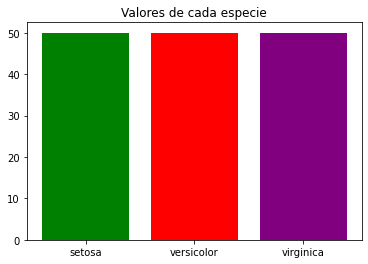

In [47]:
i_setosa = df[df['Species']  == 'setosa'].count()
i_versicolor = df[df['Species']  == 'versicolor'].count()
i_virginica = df[df['Species']  == 'virginica'].count()



data={'setosa':i_setosa[0],'versicolor':i_versicolor[0],'virginica':i_virginica[0]}
nombre = list(data.keys())
cuenta = list(data.values())
color= ('green','red','purple')
plt.bar(nombre,cuenta,color=color)
plt.title('Valores de cada especie')

**(2) Elabore un diagrama de caja (Box plot) del conjunto de datos, que nos muestre la representación visual de cómo se dispersan nuestros datos en el plano. Este método se utiliza en el análisis estadístico para comprender varias medidas, como la media, la mediana y la desviación**.

In [48]:
i_setosa

Sepal.Length    50
Sepal.Width     50
Petal.Length    50
Petal.Width     50
Species         50
dtype: int64

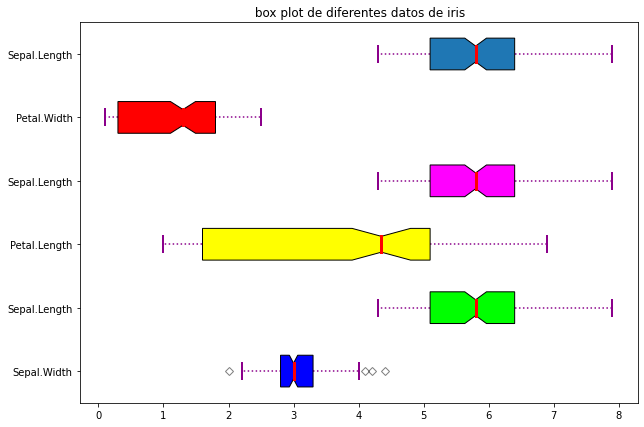

In [49]:
data = [data_sorted_bySW['Sepal.Width'], data_sorted_bySW['Sepal.Length'], data_sorted_byPL['Petal.Length'],data_sorted_byPL['Sepal.Length'],data_sorted_byPW['Petal.Width'],data_sorted_byPW['Sepal.Length']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF','red']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Sepal.Width', 'Sepal.Length',
                    'Petal.Length', 'Sepal.Length','Petal.Width','Sepal.Length'])
 
# Adding title
plt.title(" box plot de diferentes datos de iris")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

**(3) Muestre una gráfica que permita analizar la longitud del sépalo para cada especie. Esto es, analice cada atributo por separado para cada especie. Use un color diferente para cada especie**.

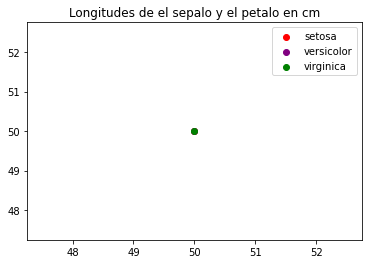

In [50]:
xset = i_setosa['Sepal.Length']
yset = i_setosa['Petal.Length']
xver = i_versicolor['Sepal.Length']
yver = i_versicolor['Petal.Length']
xvir = i_virginica['Sepal.Length']
yvir = i_virginica['Petal.Length']
plt.scatter(xset,yset,c='red',label='setosa')
plt.scatter(xver,yver,c='purple',label='versicolor')
plt.scatter(xvir,yvir,c='green',label='virginica')
plt.title('Longitudes de el sepalo y el petalo en cm')
plt.legend()

**(4) Trace una gráfica que indique el promedio de todas las longitudes de sépalos de especies de Iris. Use un color diferente para cada especie**.

Text(0.5, 1.0, 'promedio de longitudes')

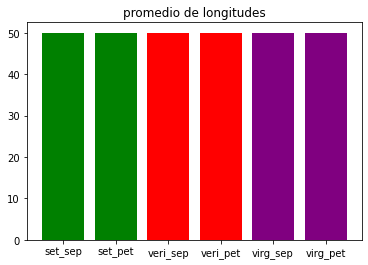

In [51]:
msetse=i_setosa['Sepal.Length'].mean()
msetpe=i_setosa['Petal.Length'].mean()
mverse = i_versicolor['Sepal.Length'].mean()
mverpe = i_versicolor['Petal.Length'].mean()
mvirse= i_virginica['Sepal.Length'].mean()
mvirpe = i_virginica['Petal.Length'].mean()
data={'set_sep':msetse,'set_pet':msetpe,'veri_sep':mverse,'veri_pet':mverpe,'virg_sep':mvirse,'virg_pet':mvirpe}
nom = list(data.keys())
prom = list(data.values())
col= ('green','green','red','red','purple','purple')
plt.bar(nom,prom,color=col)
plt.title('promedio de longitudes')

**(5) Elabore una gráfica que nos permita identificar cada especie con sus atributos. Esto es, una gráfica que me permita clasificar si una especie en particular es Iris-setosa, Iris-versicolor o Iris-virginica**.  

In [62]:
df = pd.read_csv("iris.csv")
data_sorted_bySW = df.sort_values('Sepal.Width')
data_sorted_byPL = df.sort_values('Petal.Length')
data_sorted_byPW = df.sort_values('Petal.Width')
df2 = df.iloc[:100, :]
i_setosa = df[df['Species']  == 'setosa']
i_versicolor = df[df['Species']  == 'versicolor']
i_virginica = df[df['Species']  == 'virginica']
i_setosa.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
# Iris-setosa
trace_setosa = go.Scatter3d(
                        x = i_setosa['Sepal.Length'],
                        y = i_setosa['Sepal.Width'],
                        z = i_setosa['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "setosa",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(255,102, 255,0.8)'
                        )
)

# Iris-versicolor
trace_versicolor = go.Scatter3d(
                        x = i_versicolor['Sepal.Length'],
                        y = i_versicolor['Sepal.Width'],
                        z = i_versicolor['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "versicolor",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(102, 255, 51, 0.8)'
                        )
)

# Iris-virginica
trace_virginica = go.Scatter3d(
                        x = i_virginica['Sepal.Length'],
                        y = i_virginica['Sepal.Width'],
                        z = i_virginica['Petal.Length'],
                        mode = 'markers',
                        opacity = 0.7,
                        name = "virginica",
                        marker = dict(
                                    size = 5,
                                    color = 'rgba(51, 102, 255, 0.8)'
                        )
)

list_3d = [trace_setosa, trace_versicolor, trace_virginica]

fig_3d = go.Figure(data = list_3d)
iplot(fig_3d)